### Backorder prediction

Desciption
Product Back orders *What is a backorder? : A customer order that has not been fulfilled. A backorder generally indicates that customer demand for a product or service exceeds a company’s capacity to supply it. Total backorders, also known as backlog, may be expressed in terms of units or dollar amount. *Product backorder may be the result of strong sales performance (e.g. the product is in such high demand that production cannot keep up with sales). However, backorders can upset consumers, lead to canceled orders and decreased customer loyalty. Companies want to avoid backorders, but also avoid overstocking every product (leading to higher inventory costs). *Machine learning can identify patterns related to backorders before customers order. Production can then adjust to minimize delays while customer service can provide accurate dates to keep customers informed and happy. The predictive analytics approach enables the maximum product to get in the hands of customers at the lowest cost to the organization.

.sku – Random ID for the product
.national_inv – Current inventory level for the part
.lead_time – Transit time for product (if available)
.in_transit_qty – Amount of product in transit from source
.forecast_3_month – Forecast sales for the next 3 months
.forecast_6_month – Forecast sales for the next 6 months
.forecast_9_month – Forecast sales for the next 9 months
.sales_1_month – Sales quantity for the prior 1 month time period
.sales_3_month – Sales quantity for the prior 3 month time period
.sales_6_month – Sales quantity for the prior 6 month time period
.sales_9_month – Sales quantity for the prior 9 month time period
.min_bank – Minimum recommend amount to stock
.potential_issue – Source issue for part identified
.pieces_past_due – Parts overdue from source
.perf_6_month_avg – Source performance for prior 6 month period
.perf_12_month_avg – Source performance for prior 12 month period
.local_bo_qty – Amount of stock orders overdue
.deck_risk – Part risk flag
.oe_constraint – Part risk flag
.ppap_risk – Part risk flag
.stop_auto_buy – Part risk flag
.rev_stop – Part risk flag
.went_on_backorder – Product actually went on backorder. This is the target value.

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,recall_score,accuracy_score,f1_score,roc_curve,roc_auc_score,precision_recall_curve
from sklearn.impute import KNNImputer

In [2]:
df=pd.read_csv("Kaggle_Training_Dataset_v2.csv")
df.head(10)

C:\Users\OM\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
5,1044198,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No
6,1044643,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
7,1045098,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,Yes,No,Yes,Yes,No,No
8,1045815,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
9,1045867,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,No,No,No,Yes,No,No


In [3]:
#Descrriptive analytics
df.shape

(1687861, 23)

In [4]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
went_on_backorder         1
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(1687861, 23)

In [8]:
df.rename({"went_on_backorder":"backorder"},axis=1,inplace=True)

In [9]:
df.duplicated().sum()

0

In [10]:
df.shape

(1687861, 23)

In [11]:
df.isnull().sum()

sku                       0
national_inv              1
lead_time            100894
in_transit_qty            1
forecast_3_month          1
forecast_6_month          1
forecast_9_month          1
sales_1_month             1
sales_3_month             1
sales_6_month             1
sales_9_month             1
min_bank                  1
potential_issue           1
pieces_past_due           1
perf_6_month_avg          1
perf_12_month_avg         1
local_bo_qty              1
deck_risk                 1
oe_constraint             1
ppap_risk                 1
stop_auto_buy             1
rev_stop                  1
backorder                 1
dtype: int64

In [12]:
df.drop("sku",axis=1,inplace=True)

In [13]:
df.duplicated().sum()

667552

In [14]:
df.drop(1687860,axis=0,inplace=True)

In [15]:
df.duplicated().sum()

667552

In [16]:
df.isnull().sum()

national_inv              0
lead_time            100893
in_transit_qty            0
forecast_3_month          0
forecast_6_month          0
forecast_9_month          0
sales_1_month             0
sales_3_month             0
sales_6_month             0
sales_9_month             0
min_bank                  0
potential_issue           0
pieces_past_due           0
perf_6_month_avg          0
perf_12_month_avg         0
local_bo_qty              0
deck_risk                 0
oe_constraint             0
ppap_risk                 0
stop_auto_buy             0
rev_stop                  0
backorder                 0
dtype: int64

In [17]:
cat_cols=df.select_dtypes(include=object)

In [18]:
for i in cat_cols.columns:
    df[i]=df[i].map({"Yes":1,"No":0})

In [19]:
df[df.duplicated()]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,backorder
21,18.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
32,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
41,10.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
47,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
53,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687749,-5.0,12.0,0.0,9.0,11.0,13.0,12.0,12.0,13.0,14.0,...,0.0,0.74,0.74,5.0,0,0,1,1,0,0
1687762,0.0,2.0,0.0,7.0,8.0,8.0,0.0,2.0,2.0,2.0,...,0.0,0.51,0.53,2.0,1,0,1,1,0,1
1687792,0.0,2.0,0.0,87.0,87.0,87.0,0.0,0.0,8.0,8.0,...,0.0,0.90,0.70,8.0,1,0,0,1,0,0
1687798,-25.0,9.0,10.0,72.0,72.0,72.0,0.0,25.0,50.0,50.0,...,0.0,0.91,0.77,25.0,0,0,0,1,0,0


In [20]:
df.drop_duplicates(inplace=True)

In [21]:
df.shape

(1020308, 22)

In [22]:
df.skew()

national_inv         271.354314
lead_time              4.611769
in_transit_qty       129.300897
forecast_3_month     108.156731
forecast_6_month     108.129959
forecast_9_month     111.502040
sales_1_month        152.563942
sales_3_month        109.920230
sales_6_month        108.288785
sales_9_month        105.079087
min_bank             102.137942
potential_issue       35.039607
pieces_past_due      320.676106
perf_6_month_avg      -3.917974
perf_12_month_avg     -4.145775
local_bo_qty         128.483514
deck_risk              1.715966
oe_constraint         67.468215
ppap_risk              2.332814
stop_auto_buy         -4.691435
rev_stop              54.197582
backorder              9.814284
dtype: float64

In [23]:
df.columns

Index(['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month',
       'forecast_6_month', 'forecast_9_month', 'sales_1_month',
       'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank',
       'potential_issue', 'pieces_past_due', 'perf_6_month_avg',
       'perf_12_month_avg', 'local_bo_qty', 'deck_risk', 'oe_constraint',
       'ppap_risk', 'stop_auto_buy', 'rev_stop', 'backorder'],
      dtype='object')

In [469]:
df["forecast_total"]=df["forecast_3_month"]+df["forecast_6_month"]+df["forecast_9_month"]
df["sales_total"]=df["sales_1_month"]+df["sales_3_month"]+df["sales_6_month"]+df["sales_9_month"]

In [470]:
df.shape

(1020308, 24)

In [471]:
df.duplicated().sum()

0

In [473]:
df.backorder.value_counts()

0    1010034
1      10274
Name: backorder, dtype: int64

In [472]:
df[(df["forecast_total"]!=0.0) | (df["sales_total"]!=0.0) |(df.backorder!=0)]

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,backorder,forecast_total,sales_total
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,-99.00,0.0,1,0,0,1,0,0,0.0,4.0
8,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,...,-99.00,0.0,0,0,0,1,0,0,281.0,0.0
27,4.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,-99.00,0.0,0,0,0,1,0,0,0.0,2.0
28,0.0,NaN,0.0,0.0,0.0,0.0,1.0,1.0,1.0,3.0,...,-99.00,0.0,1,0,0,1,0,0,0.0,6.0
31,20.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,...,-99.00,0.0,0,0,0,1,0,0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,...,0.69,5.0,1,0,0,1,0,0,30.0,19.0
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,...,-99.00,1.0,0,0,0,1,0,0,21.0,15.0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,...,0.84,1.0,1,0,0,0,0,1,27.0,31.0
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,...,0.84,6.0,0,0,0,1,0,0,252.0,456.0


In [243]:
((df["forecast_3_month"]!=0) | (df["sales_3_month"]!=0) | (df["backorder"]!=0))!

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,backorder
0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687857,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1687858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
df.head(10)

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,backorder
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,0,0,0,1,0,0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,0,0,0,1,0,0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
5,13.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0
6,1095.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,1,0,0,1,0,0
7,6.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.00,0.00,0.0,1,0,1,1,0,0
8,140.0,NaN,0.0,15.0,114.0,152.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,0,0,0,1,0,0
9,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.82,0.87,0.0,0,0,0,1,0,0


In [24]:
print(df.backorder.value_counts()/df.shape[0])
print("The backorder are mere 1% of the entire population")

0    0.98993
1    0.01007
Name: backorder, dtype: float64
The backorder are mere 1% of the entire population


In [25]:
num=df.select_dtypes(include=float)
num

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
1,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.99,0.99,0.0
2,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-99.00,-99.00,0.0
3,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.10,0.13,0.0
4,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,-99.00,-99.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1687855,0.0,2.0,0.0,10.0,10.0,10.0,0.0,5.0,7.0,7.0,0.0,0.0,0.69,0.69,5.0
1687856,-1.0,NaN,0.0,5.0,7.0,9.0,1.0,3.0,3.0,8.0,0.0,0.0,-99.00,-99.00,1.0
1687857,-1.0,9.0,0.0,7.0,9.0,11.0,0.0,8.0,11.0,12.0,0.0,0.0,0.86,0.84,1.0
1687858,62.0,9.0,16.0,39.0,87.0,126.0,35.0,63.0,153.0,205.0,12.0,0.0,0.86,0.84,6.0


In [26]:
num.skew()

national_inv         271.354314
lead_time              4.611769
in_transit_qty       129.300897
forecast_3_month     108.156731
forecast_6_month     108.129959
forecast_9_month     111.502040
sales_1_month        152.563942
sales_3_month        109.920230
sales_6_month        108.288785
sales_9_month        105.079087
min_bank             102.137942
pieces_past_due      320.676106
perf_6_month_avg      -3.917974
perf_12_month_avg     -4.145775
local_bo_qty         128.483514
dtype: float64

In [27]:
se=StandardScaler()
df_se=se.fit_transform(df)

In [28]:
df_se=df.copy()
for i in num.columns:
    df_se[i]=se.fit_transform(np.array(df_se[i]).reshape(-1,1))

In [29]:
df_se.head()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,backorder
0,-0.019321,NaN,-0.042087,-0.045276,-0.045108,-0.045148,-0.037279,-0.043324,-0.045681,-0.045485,...,-0.01108,-4.158862,-4.374827,-0.023805,0,0,0,1,0,0
1,-0.019268,0.179277,-0.042087,-0.045276,-0.045108,-0.045148,-0.037279,-0.043324,-0.045681,-0.045485,...,-0.01108,0.248734,0.237609,-0.023805,0,0,0,1,0,0
2,-0.019268,NaN,-0.042087,-0.045276,-0.045108,-0.045148,-0.037279,-0.043324,-0.045681,-0.045485,...,-0.01108,-4.158862,-4.374827,-0.023805,1,0,0,1,0,0
3,-0.019135,0.040196,-0.042087,-0.045276,-0.045108,-0.045148,-0.037279,-0.043324,-0.045681,-0.045485,...,-0.01108,0.209502,0.197938,-0.023805,0,0,0,1,0,0
4,-0.019109,NaN,-0.042087,-0.045276,-0.045108,-0.045148,-0.037279,-0.043324,-0.045681,-0.045276,...,-0.01108,-4.158862,-4.374827,-0.023805,1,0,0,1,0,0


In [30]:
df_med=df.copy()
df_med["lead_time"].fillna(df_med["lead_time"].mean(),inplace=True)

In [31]:
df_med.skew()

national_inv         271.354314
lead_time              4.706926
in_transit_qty       129.300897
forecast_3_month     108.156731
forecast_6_month     108.129959
forecast_9_month     111.502040
sales_1_month        152.563942
sales_3_month        109.920230
sales_6_month        108.288785
sales_9_month        105.079087
min_bank             102.137942
potential_issue       35.039607
pieces_past_due      320.676106
perf_6_month_avg      -3.917974
perf_12_month_avg     -4.145775
local_bo_qty         128.483514
deck_risk              1.715966
oe_constraint         67.468215
ppap_risk              2.332814
stop_auto_buy         -4.691435
rev_stop              54.197582
backorder              9.814284
dtype: float64

In [126]:
df[df.backorder==1]["lead_time"].isnull().sum()

324

In [127]:
df[df.backorder==1]["lead_time"].shape

(11293,)

In [128]:
11293/1680000

0.00672202380952381

There are 2 ways to proceed 
    1. Reduce the number of majority clas to match the minority class (NearMiss)
    2. Increase the minority class to match the majority class (SMOTE)
We'll look into both of these methods

In [32]:
X=df_med.drop("backorder",axis=1)
y=df_med["backorder"]

In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y)

In [41]:
#NearMiss
from imblearn.under_sampling import NearMiss

In [42]:
nm=NearMiss()
X_train_nm,y_train_nm=nm.fit_sample(X_train,y_train)

C:\Users\OM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\OM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\OM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [43]:
np.bincount(y_train_nm)

array([7192, 7192], dtype=int64)

In [44]:
X_train_nm=pd.DataFrame(X_train_nm,columns=X_train.columns)

In [45]:
xgb=XGBClassifier(max_depth=5,n_estimators=300)
xgb.fit(X_train_nm,y_train_nm)




In [68]:
pred_nm=(xgb.predict_proba(X_test)[:,1]>0.65).astype(int)

In [69]:
print(classification_report(y_test,pred_nm))

              precision    recall  f1-score   support

           0       0.99      0.10      0.17    303011
           1       0.01      0.93      0.02      3082

    accuracy                           0.10    306093
   macro avg       0.50      0.51      0.10    306093
weighted avg       0.98      0.10      0.17    306093



In [46]:
print(classification_report(y_test,pred_nm))

              precision    recall  f1-score   support

           0       0.99      0.08      0.15    303011
           1       0.01      0.94      0.02      3082

    accuracy                           0.09    306093
   macro avg       0.50      0.51      0.09    306093
weighted avg       0.98      0.09      0.15    306093



In [156]:
y_train_nm

array([0, 0, 0, ..., 1, 1, 1], dtype=int64)

In [74]:
confusion_matrix(y_test,pred_nm)

array([[ 28885, 274126],
       [   228,   2854]], dtype=int64)

In [47]:
confusion_matrix(y_test,pred_nm)

array([[ 25374, 277637],
       [   198,   2884]], dtype=int64)

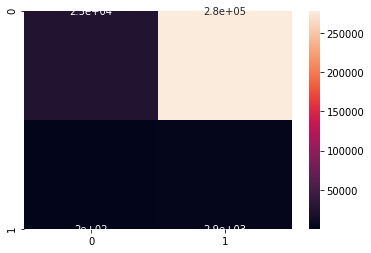

In [48]:
sns.heatmap(confusion_matrix(y_test,pred_nm),annot=True)

In [49]:
recall_score(y_test,pred_nm)

0.9357560025957171

In [50]:
accuracy_score(y_test,pred_nm)

0.09231834769171461

In [72]:
pred_prob=xgb.predict_proba(X_test)[:,1]
roc_auc=roc_auc_score(y_test,pred_prob)

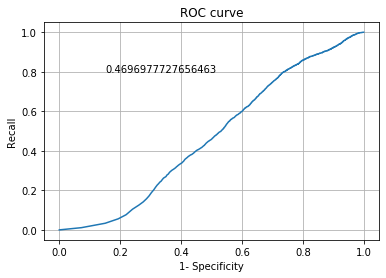

In [73]:
fpr,tpr,threshold=roc_curve(y_test,pred_prob)
plt.plot(fpr,tpr)

plt.ylabel("Recall")
plt.xlabel("1- Specificity")
plt.title("ROC curve")
plt.text(0.15,0.8,roc_auc)
plt.grid()

In [75]:
#Using SMOTE model
from imblearn.over_sampling import SMOTE
sm=SMOTE()
X_train_sm,y_train_sm=sm.fit_sample(X_train,y_train)

C:\Users\OM\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [76]:
np.bincount(y_train_sm)

array([707023, 707023], dtype=int64)

In [77]:
X_train_sm=pd.DataFrame(X_train_sm,columns=X_train.columns)

In [158]:
xgb=XGBClassifier(max_depth=5,n_estimators=300)
xgb.fit(X_train_sm,y_train_sm)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [189]:
pred_nm=(xgb.predict_proba(X_test)[:,1]>0.63
        ).astype(int)

In [190]:
print(classification_report(y_test,pred_nm))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    303011
           1       0.13      0.56      0.21      3082

    accuracy                           0.96    306093
   macro avg       0.56      0.76      0.60    306093
weighted avg       0.99      0.96      0.97    306093



In [100]:
confusion_matrix(y_test,pred_nm)

array([[290937,  12074],
       [  1355,   1727]], dtype=int64)

In [147]:
pred_prob=xgb.predict_proba(X_test)[:,1]
pred=xgb.predict(X_test)
roc_score=roc_auc_score(y_test,pred_prob)

In [157]:
f1_score(y_test,pred_nm)

0.17836071525823727

In [103]:
(fpr,tpr,threshold)=roc_curve(y_test,pred_prob)

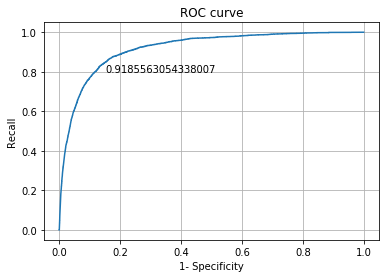

In [148]:
plt.plot(fpr,tpr)
plt.ylabel("Recall")
plt.xlabel("1- Specificity")
plt.title("ROC curve")
plt.text(0.15,0.8,roc_score)
plt.grid()

In [105]:
f1_score(y_test,pred_nm)

0.20458449327726114

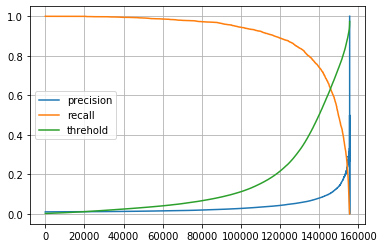

In [139]:
precision,recall,thresholds=precision_recall_curve(y_test,pred_prob)
plt.plot(precision,label="precision")
plt.plot(recall,label="recall")

plt.plot(thresholds,label="threhold")

plt.grid()
plt.legend()
plt.show()

array([0.00230521, 0.00230525, 0.00230567, ..., 0.967969  , 0.9681017 ,
       0.9737369 ], dtype=float32)

In [182]:
cost=np.array([0,-10,0,500]).reshape(2,2)

In [183]:
cost

array([[  0, -10],
       [  0, 500]])

In [184]:
cost.shape

(2, 2)

In [196]:
final=confusion_matrix(y_test,pred_nm)*cost

In [197]:
final

array([[      0, -115090],
       [      0,  867000]], dtype=int64)

In [198]:
final.sum()

751910

In [203]:
profit=list()
for i in np.linspace(0.1,1,25):
    pred_nm=(xgb.predict_proba(X_test)[:,1]>i
        ).astype(int)
    cm=confusion_matrix(y_test,pred_nm)
    final=cm*cost
    total_profit=final.sum()
    print("Threshold:",i," Profit:",total_profit)
    profit.append((total_profit,i))


Threshold: 0.1  Profit: 637790
Threshold: 0.1375  Profit: 760650
Threshold: 0.175  Profit: 821200
Threshold: 0.2125  Profit: 855980
Threshold: 0.25  Profit: 876480
Threshold: 0.2875  Profit: 892660
Threshold: 0.32499999999999996  Profit: 894270
Threshold: 0.36250000000000004  Profit: 899460
Threshold: 0.4  Profit: 896290
Threshold: 0.4375  Profit: 882440
Threshold: 0.475  Profit: 866800
Threshold: 0.5125  Profit: 845190
Threshold: 0.5499999999999999  Profit: 816920
Threshold: 0.5875  Profit: 786220
Threshold: 0.625  Profit: 753180
Threshold: 0.6625  Profit: 724140
Threshold: 0.7  Profit: 678390
Threshold: 0.7374999999999999  Profit: 628870
Threshold: 0.7749999999999999  Profit: 560770
Threshold: 0.8125  Profit: 483180
Threshold: 0.85  Profit: 383880
Threshold: 0.8875  Profit: 265150
Threshold: 0.9249999999999999  Profit: 78170
Threshold: 0.9624999999999999  Profit: 500
Threshold: 1.0  Profit: 0


Maximum profit at threshold of 0.3625 of $899460